# Week 7 : Lab A
 ## Test, log, debug and optimize
 ##### CS1P - University of Glasgow - John H. Williamson - 2019/2020 -- Python 3.x

## Lab exercise

**You must submit a reasonble attempt at this exercise to gain a tick for this work**.

**Note that Part B is in a separate Moodle download.**

<div class="alert alert-box alert-danger"> 
Remember to save your work frequently! </div>

## Purpose of this lab

This lab will get you up to speed on:
* reading and writing simple logs
* writing tests with `assert`
* profiling and optimising code
* using the `ipdb` debugger

## Before the lab
* Attempt at least the A exercises.



In [1]:
## RUN THIS CELL FIRST!
%load_ext autoreload
%autoreload 2

from utils.tick import tick
from utils.test_utils import should_pass, should_fail
from utils.test_utils import reset_tracking, track, verify_track
from utils.complexity import time_complexity            
from IPython.core.debugger import set_trace
print("All loaded OK")

All loaded OK


## A.1 Assertions

Write a function `test_list(l)` which uses `assert` to check if a list `l` satisfies all of these constraints:

* the list is non-empty
* the list contains only strings
* every string is nonempty
* every string has only lower case letters in it
* every string is unique
* the length of the list is even


In [2]:
# Solution goes here
def test_list(l):
    assert len(l)>0
    assert len(l)%2==0
    exists = {}
    for elt in l:
        assert type(elt)==type("")
        assert len(elt)>0
        assert elt.isalpha() and elt==elt.lower()
        assert elt not in exists
        exists[elt] = True

test_list(["a", "b"])

In [3]:
## Tests
with tick():
    should_fail(test_list, [])
    should_fail(test_list, [""])
    should_fail(test_list, ["a"])
    should_fail(test_list, [1, "a"])
    should_fail(test_list, [1, 2])
    should_fail(test_list, ["a", "b", "c"])
    should_fail(test_list, ["alpha", ""])
    should_fail(test_list, ["a", "b", "c", "a"])
    should_fail(test_list, ["a", "a"])
    should_fail(test_list, ["a", "b", "3", "."])
    should_fail(test_list, ["A", "B", "C", "D"])
    should_fail(test_list, ["alpha", "Bravo", "charlIe", "delta"])
    should_fail(test_list, ["a", "b", "c", ""])

with tick():
    should_pass(test_list, ["a", "b"])
    should_pass(test_list, ["alpha", "bravo"])
    should_pass(test_list, ["alpha", "bravo", "charlie", "d"])
    should_pass(test_list, ["ale", "base", "cheap", "liqour"])
    should_pass(test_list, ["ale", "base", "cheap", "liqour", "twenty", "thirty"])


## A.2 Time complexity

The function below runs in constant time -- it doesn't depend on the value of `n` and takes the same each time it is called regardless. The `time_complexity()` call shows this as a graph, and gives scores, which should show the time complexity is most likely to be constant (it will have the highest score printed).

C:\Users\Inesh\Desktop\1P\week_7_lab_a\utils\complexity.py:21: RuntimeWarning: overflow encountered in square
  return np.sum((x*fn(ns) - ts)**2)
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)



Scores for constant_time
  constant     91.3%
  log           3.4%
  linear        1.4%
  nlogn         1.3%
  quadratic     1.0%
  cubic         0.9%
  exp           0.7%
  factorial     0.0%


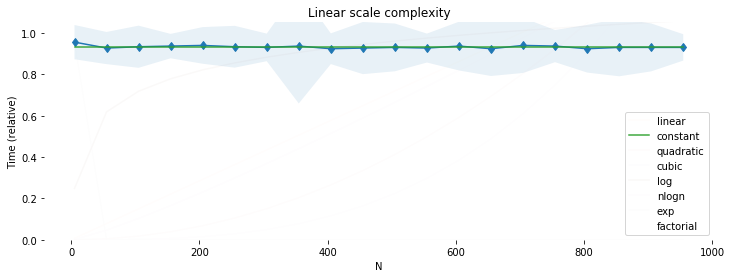

In [4]:
def constant_time(n):
    i = n 
    return i


# number=30: run the function 30 times and average the result
# ns= range(1, 1000, 50): set n to values from 1 to 1000, stepping by 50 each time
# reps=50: repeat the whole experiment 50 times
time_complexity(constant_time, ns=range(5, 1000, 50), number=30, reps=50);

**Task** Using **nested loops** write functions which take a parameter `n` and  do computations which will run in:

* `linear_time(n)` which runs in O(N) linear time
* `quadratic_time(n)` which runs in O(N^2) quadratic time
* `cubic_time(n)` which runs in O(N^3) cubic time

Plot graphs for each, using `time_complexity`. Use `number=20`, `ns=range(5, 100, 5)`, `reps=15`


C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1961: RuntimeWarning: overflow encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1961: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: overflow encountered in double_scalars
  if ((p > tmp2 * (a - x)) and (p < tmp2 * (b - x)) and



Scores for linear_time
  linear       38.6%
  nlogn        21.1%
  log          12.4%
  quadratic    10.3%
  constant      7.4%
  cubic         7.0%
  exp           3.1%
  factorial     0.0%

Scores for quadratic_time
  nlogn        28.4%
  quadratic    21.5%
  linear       20.3%
  cubic        11.7%
  log           8.2%
  constant      6.2%
  exp           3.7%
  factorial     0.0%

Scores for cubic_time
  cubic        82.8%
  quadratic     6.9%
  nlogn         3.3%
  linear        2.7%
  log           1.7%
  constant      1.5%
  exp           1.1%
  factorial     0.0%


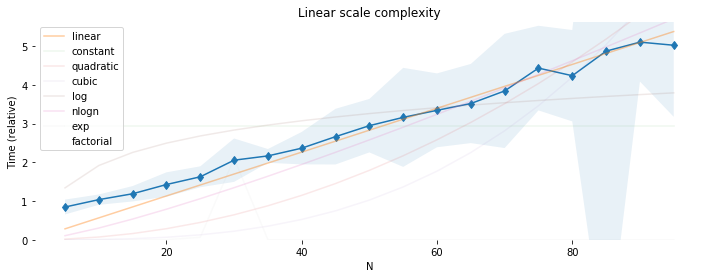

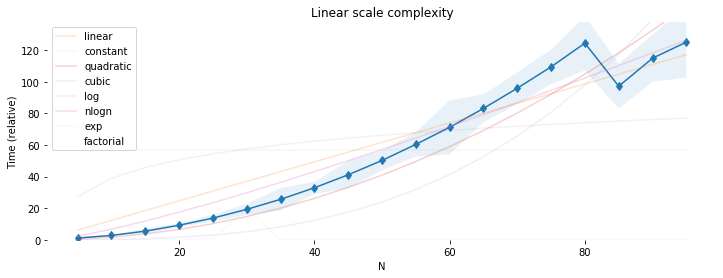

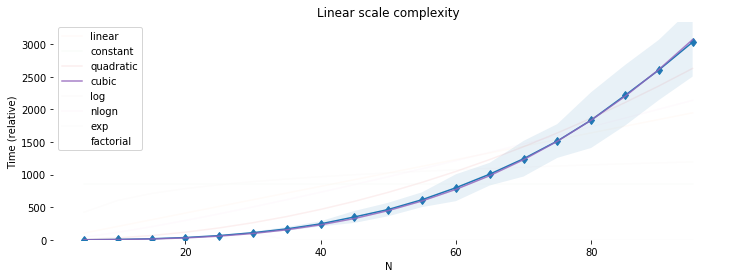

In [5]:
# Solution goes here
def linear_time(n):
    x = 0
    for i in range(n):
        x+=i
    return x

def quadratic_time(n):    
    x = 0
    for i in range(n):
        for j in range(n):
            x+=i
    return x

def cubic_time(n):    
    x = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                x+=i
    return x

time_complexity(linear_time, ns=range(5, 100, 5), number=10, reps=15);
time_complexity(quadratic_time, ns=range(5, 100, 5), number=10, reps=15);
time_complexity(cubic_time, ns=range(5, 100, 5), number=10, reps=15);

In [6]:
## Tests
with tick():
    _, _, scores = time_complexity(linear_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["linear"]>0.2 

with tick():
    _, _, scores = time_complexity(quadratic_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["quadratic"]>0.5

with tick():    
    _, _, scores = time_complexity(cubic_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["cubic"]>0.5



C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: overflow encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1962: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Users\Inesh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1970: RuntimeWarning: overflow encountered in double_scalars
  (numpy.abs(p) < numpy.abs(0.5 * tmp2 * dx_temp))):


## A.2B (OPTIONAL EXTENSION) 

Write a function that runs in O(N log N) time, and plot the time complexity graph. (hint: how long does `x.sorted()` take for a list of `n` *random* items x?)


Scores for nlogn_time
  linear       41.2%
  nlogn        31.1%
  quadratic     9.7%
  log           6.9%
  constant      5.6%
  cubic         2.8%
  exp           2.8%
  factorial     0.0%


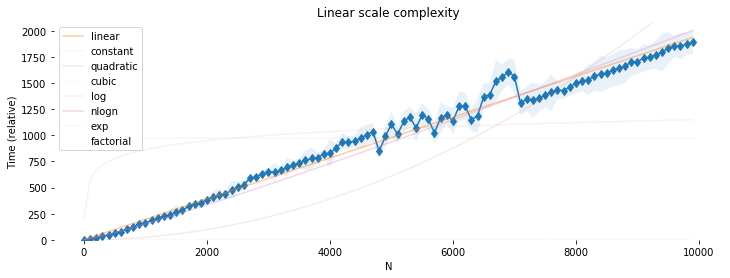

In [7]:
# Solution goes here
import random

x = []
for i in range(10000):
    x.append(random.random())

def nlogn_time(n):            
    return sorted(x[:n])

time_complexity(nlogn_time, ns=range(5, 10000, 100), number=10, reps=15);

# A.3 Visualise recursion with logging

Many people find it hard to visualise what is going on in recursion. Use the *principles of logging* to add `print` statements that make a trace of what happens when the recursive function below is called. 

Try and print out the results nicely; you might want to add additional parameters to the function to make logging nicer.


In [8]:
## This function returns the ordered permutations of a sequence

def permutations(l, perm=[]):
    if len(l) == 0: 
        return [perm]
    
    results = []
    for i in range(len(l)):        
        results += permutations(l[:i] + l[i+1:], perm + [l[i]])
    return results

permutations("abc")

[['a', 'b', 'c'],
 ['a', 'c', 'b'],
 ['b', 'a', 'c'],
 ['b', 'c', 'a'],
 ['c', 'a', 'b'],
 ['c', 'b', 'a']]

In [9]:
# Solution goes here
def permutations(l, perm=[], indent=""):
    print(indent + "l=[{l}], perm={perm}".format(l=l, perm=perm))      
    if len(l) == 0: 
        print(indent + "Base case, perm=[{perm}]".format(perm=perm)) # trace base case
        return [perm]
    results = []
    indent += "|  "
    for i in range(len(l)):        
        print(indent + "{item} =>".format(item=l[i]))
        result = permutations(l[:i] + l[i+1:], perm + [l[i]], indent+"  "+l[i]+"--")
        print(indent + "Result was {result}".format(result=result))
        results += result        
    indent = indent[:-3]
    print(indent + "Returning {results}".format(results=results))
    return results

permutations("abc")

l=[abc], perm=[]
|  a =>
|    a--l=[bc], perm=['a']
|    a--|  b =>
|    a--|    b--l=[c], perm=['a', 'b']
|    a--|    b--|  c =>
|    a--|    b--|    c--l=[], perm=['a', 'b', 'c']
|    a--|    b--|    c--Base case, perm=[['a', 'b', 'c']]
|    a--|    b--|  Result was [['a', 'b', 'c']]
|    a--|    b--Returning [['a', 'b', 'c']]
|    a--|  Result was [['a', 'b', 'c']]
|    a--|  c =>
|    a--|    c--l=[b], perm=['a', 'c']
|    a--|    c--|  b =>
|    a--|    c--|    b--l=[], perm=['a', 'c', 'b']
|    a--|    c--|    b--Base case, perm=[['a', 'c', 'b']]
|    a--|    c--|  Result was [['a', 'c', 'b']]
|    a--|    c--Returning [['a', 'c', 'b']]
|    a--|  Result was [['a', 'c', 'b']]
|    a--Returning [['a', 'b', 'c'], ['a', 'c', 'b']]
|  Result was [['a', 'b', 'c'], ['a', 'c', 'b']]
|  b =>
|    b--l=[ac], perm=['b']
|    b--|  a =>
|    b--|    a--l=[c], perm=['b', 'a']
|    b--|    a--|  c =>
|    b--|    a--|    c--l=[], perm=['b', 'a', 'c']
|    b--|    a--|    c--Base case, perm=[

[['a', 'b', 'c'],
 ['a', 'c', 'b'],
 ['b', 'a', 'c'],
 ['b', 'c', 'a'],
 ['c', 'a', 'b'],
 ['c', 'b', 'a']]

## A.4 Test driven development


<img src="imgs/palette.jpg" width="100%">
*Image: "DSC_8226" by huguet92 is licensed under CC BY-NC-ND 2.0* 

The code below is supposed to do something with colours. The `hexify_colour` function doesn't work and you don't know exactly what the code is supposed to do. It was written by a junior developer and has a lot of issues, even though it looks basically correct.  

But you do have tests which check what the results *should* be. Using these tests:

* work out what the code should be doing
* fix it so it does the right thing


In [10]:
def hexify_color(r,g=None,b=None):        
    r_int = int(r*255)
    g_int = int(g*255)
    b_int = int(b*255)    
    s = "#{r:03x}{b:02x}{g:02x}".format(r=r_int, g=g_int, b=b_int)    
    print(s)    

In [11]:
## Tests
with tick():
    assert hexify_color(0.0, 0.0, 0.0) == '#000000'
    assert hexify_color(0.5, 0.5, 0.5) == '#7f7f7f'
    assert hexify_color(1.0, 1.0, 1.0) == '#ffffff'
    assert hexify_color(1.0, 0.0, 0.0) == '#ff0000'
    assert hexify_color(0.0, 1.0, 0.0) == '#00ff00'
    assert hexify_color(0.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(1.0) == '#ffffff'
    assert hexify_color(0.0) == '#000000'
    assert hexify_color(-1.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(-1.0, 0.0, 10.0) == '#0000ff'
    assert hexify_color(10.0, 10.0, 10.0) == '#ffffff'

    assert hexify_color(-1.0) == '#000000'
    assert hexify_color(0.5) == '#7f7f7f'

    should_fail(hexify_color, 0.5, 0.5)
    should_fail(hexify_color, 0.5, 0.5)

#0000000


AssertionError: 

In [12]:
# Solution goes here
def clamp(x, a, b):
    if x<a: 
        return a
    if x>b:
        return b
    return x

def hexify_color(r,g=None,b=None):
    if b is None:
        assert g is None            
        g = r
        b = r        
    r_int = int(clamp(r, 0, 1)*255)
    g_int = int(clamp(g, 0, 1)*255)
    b_int = int(clamp(b, 0, 1)*255)
    s = "#{r:02x}{g:02x}{b:02x}".format(r=r_int, b=b_int, g=g_int)
    print(s)
    return s

In [13]:
## Tests
with tick():
    assert hexify_color(0.0, 0.0, 0.0) == '#000000'
    assert hexify_color(0.5, 0.5, 0.5) == '#7f7f7f'
    assert hexify_color(1.0, 1.0, 1.0) == '#ffffff'
    assert hexify_color(1.0, 0.0, 0.0) == '#ff0000'
    assert hexify_color(0.0, 1.0, 0.0) == '#00ff00'
    assert hexify_color(0.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(1.0) == '#ffffff'
    assert hexify_color(0.0) == '#000000'
    assert hexify_color(-1.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(-1.0, 0.0, 10.0) == '#0000ff'
    assert hexify_color(10.0, 10.0, 10.0) == '#ffffff'

    assert hexify_color(-1.0) == '#000000'
    assert hexify_color(0.5) == '#7f7f7f'

    should_fail(hexify_color, 0.5, 0.5)
    should_fail(hexify_color, 0.5, 0.5)

#000000
#7f7f7f
#ffffff
#ff0000
#00ff00
#0000ff
#ffffff
#000000
#0000ff
#0000ff
#ffffff
#000000
#7f7f7f


## A.4 Basic ipdb


The code below is a solution to Lab 3, A.4. Practice tracing through this code using the `ipdb` debugger. You should watch the video tutorial on ipdb (Week 7's video) before attempting this part.

Here's a quick reference to `ipdb` commands:


### Basic debugger commands

The `ipdb` debugger can either take single letter commands or the full text. 

* `s` **step** execute the next line, and *enter* any function that is called
* `n` **next** execute the next line, and *skip* over any function that is called
* `c` **continue** resume running until the next breakpoint is hit
* **return** continue until the end of the current function
* `r` **run** restart the program
* `l` **list** print out the code corresponding to the current execution point
* `u`/`d` **up/down** in the call stack
* `p` **print** print out a value (e.g. `p my_list` to print out the current value of `my_list`)
* `a` **args** print out the arguments that were used in the call to the current function
* `q` **quit** **YOU MUST QUIT THE DEBUGGER BEFORE ANY OTHER CODE WILL RUN!**
* `b` **breakpoint** <line_number> set a new breakpoint on the given line number (e.g. `b 20`)


You can pre-insert **breakpoints** where the debugger will stop and wait for input by writing `set_trace()` in the code.


---

### Instructions

1. Before you start: Click on the cell, and press `ESC-L` to enable line numbers

1. Add a breakpoint using `set_trace()` at the very start of `all_rotates`
1. Run the cell; `ipdb` will start.
1. You can use `help` at any time to get a list of commands inside the debugger
1. Print out the argument to `all_rotates`
1. Use `list` to see where you are in the code
1. Step into the for loop
1. Step *into* `rotate()` in the first iteration
1. Use `up` to see where the call to `rotate` came from
1. Use `down` to go back into `rotate`
1. Then, in the next iteration, skip over the call to rotate (hint: use `next`)
1. Then, set a breakpoint *in the debugger* at the second `for` loop
1. Continue to that breakpoint
1. Check the value of `rotates` is what you expect
1. Continue execution to the end of the cell
1. **Quit the debugger** using `quit`


In [14]:
def rotate(s):
    rotated = s[1:] + s[0]
    return rotated

def all_rotates(s):
    rotates = []
    for i in range(len(s)):
        rotates.append(s)
        s = rotate(s)
        
    for rotated in rotates:
        print(rotated)
    
                  
all_rotates("steel")

steel
teels
eelst
elste
lstee


In [15]:
# Solution goes here
def rotate(s):
    rotated = s[1:] + s[0]
    return rotated

def all_rotates(s):
    set_trace()
    rotates = []
    for i in range(len(s)):
        rotates.append(s)
        s = rotate(s)
    for rotated in rotates:
        print(rotated)

all_rotates("steel")

> <ipython-input-15-dd75d74846d7>(8)all_rotates()
      6 def all_rotates(s):
      7     set_trace()
----> 8     rotates = []
      9     for i in range(len(s)):
     10         rotates.append(s)

ipdb> args
s = 'steel'
ipdb> list
      3     rotated = s[1:] + s[0]
      4     return rotated
      5 
      6 def all_rotates(s):
      7     set_trace()
----> 8     rotates = []
      9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)
     12     for rotated in rotates:
     13         print(rotated)

ipdb> step/step/step
> <ipython-input-15-dd75d74846d7>(9)all_rotates()
      7     set_trace()
      8     rotates = []
----> 9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)

ipdb> up
> <ipython-input-15-dd75d74846d7>(15)<module>()
     11         s = rotate(s)
     12     for rotated in rotates:
     13         print(rotated)
     14 
---> 15 all_rotates("steel")

ipdb> down
> <ipython-input-15-dd75d74

## A.5 Reading logs

The code below is supposed to take a string then convert it to [Morse code](https://en.wikipedia.org/wiki/Morse_code). It does this by reading a file containing a Morse code table. There are several bugs, but there are logging messages provided to help you understand what is going on. Use the log messages which are generated to work out what the problems are with this code is and fix the code so it works as described above, and passes the tests. **Do not use the debugger, or add additional logging statements to the code**.

<img src="imgs/morse_key.jpg" width="30%">

<center>    
<i> A Morse key, from the days when keyboards had just the one key. Image: by Brad Wilmot CC-NC-ND </i>
</center>

In [16]:
def read_table(fname):
    morse_table = {}
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        morse_table[letter] = ""
    print("{n} blank entries in the Morse table".format(n=len(morse_table)))
    fname = "morse.txt"
    print("Reading morse table from file '{fname}'".format(fname=fname))
    with open(fname) as f:
        for line in f:
            letter, code = line.split(" ")
            morse_table = {letter: code}
            print("Mapping {letter} to {code}".format(letter=letter, code=code))

    print("{n} entries in Morse table after loading".format(n=len(morse_table)))
    print()
    return morse_table


def convert_to_morse(s):
    print()
    morse_table = read_table("data/morse.txt")
    output = []
    for ch in s:
        upper_ch = ch.upper()
        if upper_ch in morse_table:
            print("Converting {ch} to {code}".format(ch=ch, code=morse_table[upper_ch]))
            output.append(morse_table[ch.upper()])
        else:
            output.append("   ")
        output.append(" ")
    result = "".join(s)
    print("Conversion result is {result}".format(result=result))
    return result

In [17]:
# Solution goes here
def read_table(fname):
    morse_table = {}
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        morse_table[letter] = ""
    print("{n} blank entries in the Morse table".format(n=len(morse_table)))
    print("Reading morse table from file {fname}".format(fname=fname))
    with open(fname) as f:
        for line in f:
            letter, code = line.split(" ")
            code = code.strip()
            letter = letter.upper()
            morse_table[
                letter
            ] = code.strip()
            print("Mapping {letter} to {code}".format(letter=letter, code=code))
    print("{n} entries in Morse table after loading".format(n=len(morse_table)))
    print()
    return morse_table

def convert_to_morse(s):
    print()
    morse_table = read_table("data/morse.txt")
    output = []
    for ch in s:
        upper_ch = ch.upper()
        if upper_ch in morse_table:
            print("Converting {ch} to {code}".format(ch=ch, code=morse_table[upper_ch]))
            output.append(morse_table[upper_ch])
        else:
            output.append("   ")
        output.append(" ")
    result = "".join(output).strip()
    print("Conversion result is '{result}'".format(result=result))
    return result

In [18]:
with tick():
    assert convert_to_morse('sos')=='... --- ...'
    assert convert_to_morse('hello there')=='.... . .-.. .-.. ---     - .... . .-. .'
    assert convert_to_morse('sphinx of black quartz judge my vow') == '... .--. .... .. -. -..-     --- ..-.     -... .-.. .- -.-. -.-     --.- ..- .- .-. - --..     .--- ..- -.. --. .     -- -.--     ...- --- .--'


26 blank entries in the Morse table
Reading morse table from file data/morse.txt
Mapping A to .-
Mapping B to -...
Mapping C to -.-.
Mapping D to -..
Mapping E to .
Mapping F to ..-.
Mapping G to --.
Mapping H to ....
Mapping I to ..
Mapping J to .---
Mapping K to -.-
Mapping L to .-..
Mapping M to --
Mapping N to -.
Mapping O to ---
Mapping P to .--.
Mapping Q to --.-
Mapping R to .-.
Mapping S to ...
Mapping T to -
Mapping U to ..-
Mapping V to ...-
Mapping W to .--
Mapping X to -..-
Mapping Y to -.--
Mapping Z to --..
26 entries in Morse table after loading

Converting s to ...
Converting o to ---
Converting s to ...
Conversion result is '... --- ...'

26 blank entries in the Morse table
Reading morse table from file data/morse.txt
Mapping A to .-
Mapping B to -...
Mapping C to -.-.
Mapping D to -..
Mapping E to .
Mapping F to ..-.
Mapping G to --.
Mapping H to ....
Mapping I to ..
Mapping J to .---
Mapping K to -.-
Mapping L to .-..
Mapping M to --
Mapping N to -.
Mapping O to ---

<div class="alert alert-box alert-danger">
    
# Part B is an a separate file -- download from Moodle when available
</div>